### Question 6 [10 points]

Reproduce one of the images in Figure 3. 

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [9]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [10]:
clima_ds = ds.sel(time = slice('2002', '2012')).groupby('time.dayofyear').mean()
clima_ds

<xarray.Dataset>
Dimensions:           (dayofyear: 366, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * dayofyear         (dayofyear) int64 1 2 3 4 5 6 ... 361 362 363 364 365 366
Data variables:
    analysed_sst      (dayofyear, lat, lon) float32 290.1 290.0 ... nan nan
    analysis_error    (dayofyear, lat, lon) float32 0.381 0.382 ... nan nan
    mask              (dayofyear, lat, lon) float32 1.0 1.0 1.0 ... 2.0 2.0 2.0
    sea_ice_fraction  (dayofyear, lat, lon) float32 nan nan nan ... nan nan nan
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

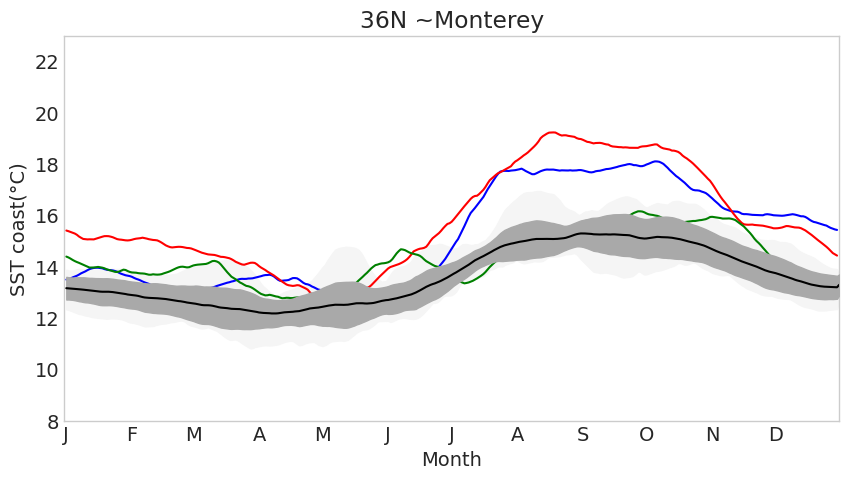

In [12]:
# slicing data for Monterey CA
monterey = ds.analysed_sst.sel(lat = 36, lon = -122, method ='nearest') - 273.15
monterey = monterey.rolling(time = 30, center = True).mean()


# creating figure and axis objects
figure, axis = plt.subplots(figsize = (10, 5))


# slicing data for year 2002-2013
maximum = monterey.sel(time = slice('2002', '2013')).groupby('time.dayofyear').max()
minimum = monterey.sel(time = slice('2002', '2013')).groupby('time.dayofyear').min()
mean = monterey.sel(time = slice('2002', '2013')).groupby('time.dayofyear').mean()
std = monterey.sel(time = slice('2002', '2013')).groupby('time.dayofyear').std()
upper_bound = mean + std
lower_bound = mean - std

# slicing data for year 2014, 2015, 2016
years = [2014, 2015, 2016]
color = ['b', 'r', 'g']
for i, year in enumerate(years):
    sst_year = monterey.sel(time = str(year))
    sst_smoothed = sst_year.groupby('time.dayofyear').mean()
    axis.plot(sst_smoothed.dayofyear.values, 
            sst_smoothed.values, color=color[i], label=str(year))
    
# plotting shaded areas for maximum and minimum values during 2002–2013
axis.fill_between(mean.dayofyear.values, minimum, maximum, color = 'whitesmoke')

#  plotting shaded areas for ±1 SD around the mean during 2002–2013
axis.fill_between(mean.dayofyear.values, lower_bound, upper_bound, color = 'darkgray', zorder = 3)

# plot mean data from 2002-2013
axis.plot(mean.dayofyear.values, mean, 'k', label = 'Mean', zorder = 3)
    
# changing x-axis label
month_starts = [1,32,61,92,122,153,183,214,245,275,306,336]
month_names = ['J','F','M','A','M','J','J','A','S','O','N','D'] 

axis.set_xticks(month_starts)
axis.set_xticklabels(month_names)
axis.set_yticks([8,10,12, 14, 16,18,20,22])
axis.grid(False)

#legend optional:
#axis.legend(loc = 'upper left', fontsize = 12)
plt.ylim(8,23)
plt.xlim(0,366)
plt.ylabel("SST coast(°C)")
plt.xlabel("Month")
plt.title("36N ~Monterey")
plt.show()